In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from collections import Counter
import os
import re
import requests

from itertools import combinations

import numpy as np

import random

from IPython.display import Markdown, display
def printmd(string):
    display(Markdown(string))
import datetime

from datetime import datetime, timedelta

In [12]:
avia = pd.read_csv('query_result_2021-07-26T00_55_30.453705Z.csv')


In [13]:
avia.head(20)

,flight_no,flight_id,departure_city,arrivai_airport_name,model,scheduled_departure,road_time,total_amount,fact_count_seat,real_count_seats,aircraft_occupancy
0,PG0480,136642,Anapa,Belgorod International Airport,Sukhoi Superjet-100,2017-01-30T09:25:00Z,0 years 0 mons 0 days 0 hours 50 mins 0.00 secs,531000.0,97,64,65
1,PG0480,136807,Anapa,Belgorod International Airport,Sukhoi Superjet-100,2017-02-23T09:25:00Z,0 years 0 mons 0 days 0 hours 50 mins 0.00 secs,531000.0,97,68,70
2,PG0252,136360,Anapa,Sheremetyevo International Airport,Boeing 737-300,2017-02-05T10:05:00Z,0 years 0 mons 0 days 1 hours 40 mins 0.00 secs,1455400.0,130,97,74
3,PG0252,136122,Anapa,Sheremetyevo International Airport,Boeing 737-300,2017-01-08T10:05:00Z,0 years 0 mons 0 days 1 hours 40 mins 0.00 secs,1431000.0,130,97,74
4,PG0252,136464,Anapa,Sheremetyevo International Airport,Boeing 737-300,2017-01-09T10:05:00Z,0 years 0 mons 0 days 1 hours 40 mins 0.00 secs,1398000.0,130,100,76
5,PG0252,136202,Anapa,Sheremetyevo International Airport,Boeing 737-300,2017-01-05T10:05:00Z,0 years 0 mons 0 days 1 hours 40 mins 0.00 secs,1495600.0,130,100,76
6,PG0252,136178,Anapa,Sheremetyevo International Airport,Boeing 737-300,2017-01-29T10:05:00Z,0 years 0 mons 0 days 1 hours 40 mins 0.00 secs,1434600.0,130,99,76
7,PG0252,136250,Anapa,Sheremetyevo International Airport,Boeing 737-300,2017-02-08T10:05:00Z,0 years 0 mons 0 days 1 hours 40 mins 0.00 secs,1407800.0,130,99,76
8,PG0480,136922,Anapa,Belgorod International Airport,Sukhoi Superjet-100,2017-02-11T09:25:00Z,0 years 0 mons 0 days 0 hours 50 mins 0.00 secs,607800.0,97,76,78
9,PG0252,136366,Anapa,Sheremetyevo International Airport,Boeing 737-300,2017-01-11T10:05:00Z,0 years 0 mons 0 days 1 hours 40 mins 0.00 secs,1527400.0,130,103,79


In [14]:
avia.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 118 entries, 0 to 117
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   flight_no             118 non-null    object 
 1   flight_id             118 non-null    int64  
 2   departure_city        118 non-null    object 
 3   arrivai_airport_name  118 non-null    object 
 4   model                 118 non-null    object 
 5   scheduled_departure   118 non-null    object 
 6   road_time             118 non-null    object 
 7   total_amount          118 non-null    float64
 8   fact_count_seat       118 non-null    int64  
 9   real_count_seats      118 non-null    int64  
 10  aircraft_occupancy    118 non-null    int64  
dtypes: float64(1), int64(4), object(6)
memory usage: 10.3+ KB


In [15]:
def get_boxplot(column):
    fig, ax = plt.subplots(figsize = (14, 4))
    sns.boxplot(x=column, y='aircraft_occupancy', 
                data=avia.loc[avia.loc[:, column].isin(avia.loc[:, column].value_counts().index[:10])],
               ax=ax)
    plt.xticks(rotation=45)
    ax.set_title('Boxplot for ' + column)
    plt.show()

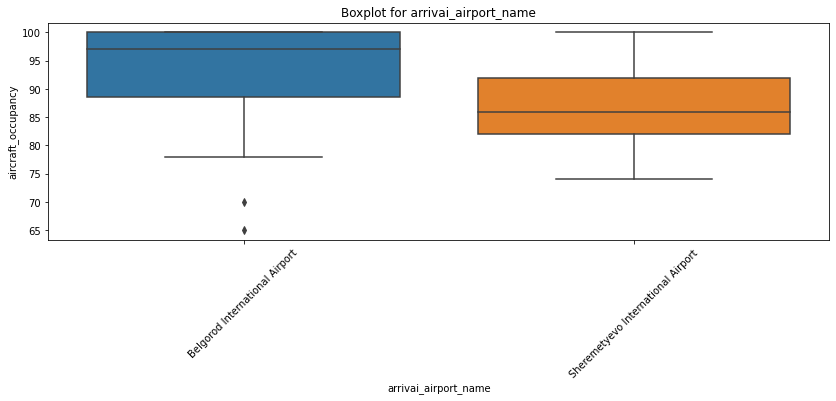

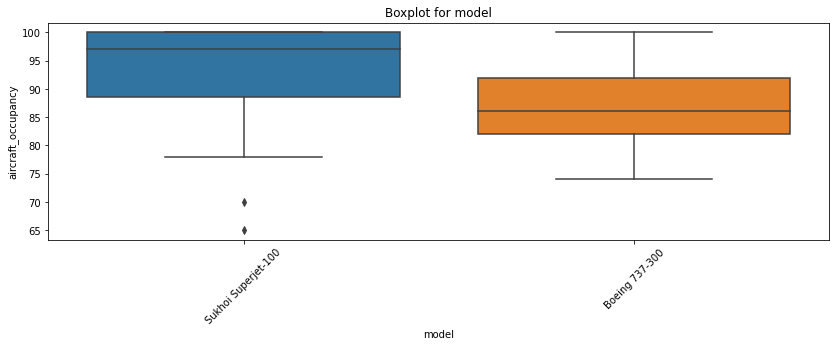

In [16]:
for col in ['arrivai_airport_name', 'model']:
    get_boxplot(col)